In [195]:
import numpy as np
import matplotlib.pyplot as plt

In [196]:
def f(x, y):
    # define a polynomial function
    return 3*x**4 + 2*x*y + 3*y**4

def df(x, y):
    # define the gradient of the polynomial function
    return np.array([12*x**3 + 2*y, 2*x + 12*y**3])

def hessianf(x, y):
    # define the Hessian matrix of the polynomial function
    return np.array([[36*x**2, 2], [2, 36*y**2]])

def diaghessianf(x, y):
    # define the diagonal of the Hessian matrix of the polynomial function
    return np.array([[36*x**2, 0], [0, 36*y**2]])

def residual(x_sol, x_true):
    # define the residual function
    return np.linalg.norm(x_sol - x_true)

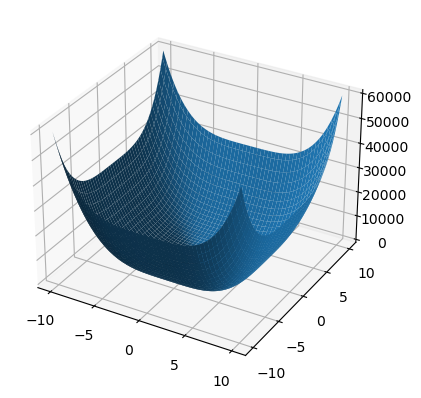

In [197]:
# plot the function
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
plt.show()

In [198]:
# Use Newton's method to find the minimum of the function
x = np.array([100, 100])
tol = 1e-6
max_iter = 100
nwt_residuals = []
for i in range(max_iter):
    x = x - np.linalg.inv(hessianf(x[0], x[1])).dot(df(x[0], x[1]))
    print(x)
    nwt_residuals.append(residual(x, np.array([0, 0])))
    if np.linalg.norm(df(x[0], x[1])) < tol:
        break

[66.6662963 66.6662963]
[44.44364198 44.44364198]
[29.62826133 29.62826133]
[19.75092424 19.75092424]
[13.16540789 13.16540789]
[8.77412629 8.77412629]
[5.8451994 5.8451994]
[3.89047357 3.89047357]
[2.58416393 2.58416393]
[1.7085619 1.7085619]
[1.11776879 1.11776879]
[0.71345503 0.71345503]
[0.42883277 0.42883277]
[0.21955947 0.21955947]
[0.06800287 0.06800287]
[0.00348368 0.00348368]
[5.07227257e-07 5.07227257e-07]
[1.56605804e-18 1.56605804e-18]


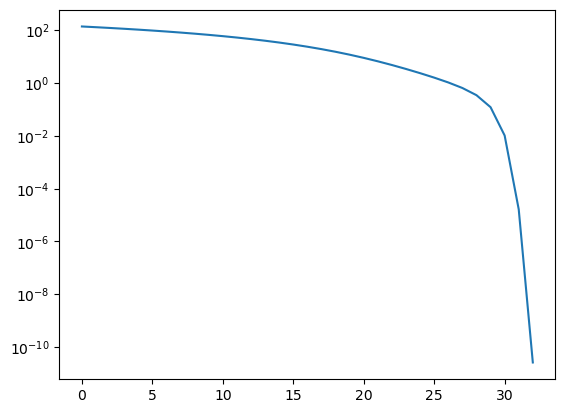

In [199]:
# plot the iteration process, y axis is in log scale
plt.plot(residuals)
plt.yscale('log')

In [200]:
# Use diagonal Newton's method to find the minimum of the function
x = np.array([100, 100])
tol = 1e-6
max_iter = 100
diagnwt_residuals = []
for i in range(max_iter):
    x = x - np.linalg.inv(diaghessianf(x[0], x[1])).dot(df(x[0], x[1]))
    print(x)
    diagnwt_residuals.append(residual(x, np.array([0, 0])))
    if np.linalg.norm(df(x[0], x[1])) < tol:
        break

[66.66611111 66.66611111]
[44.44324073 44.44324073]
[29.62757712 29.62757712]
[19.74984295 19.74984295]
[13.16374901 13.16374901]
[8.77161233 8.77161233]
[5.84140799 5.84140799]
[3.88476135 3.88476135]
[2.57554001 2.57554001]
[1.69545622 1.69545622]
[1.09753683 1.09753683]
[0.68107282 0.68107282]
[0.37247789 0.37247789]
[0.09916731 0.09916731]
[-0.4941089 -0.4941089]
[-0.21697008 -0.21697008]
[0.11140497 0.11140497]
[-0.42441114 -0.42441114]
[-0.15204044 -0.15204044]
[0.26403958 0.26403958]
[-0.03437978 -0.03437978]
[1.59301713 1.59301713]
[1.02713699 1.02713699]
[0.63067022 0.63067022]
[0.3323571 0.3323571]
[0.05441519 0.05441519]
[-0.98468 -0.98468]
[-0.60003342 -0.60003342]
[-0.30743485 -0.30743485]
[-0.0242498 -0.0242498]
[2.27480288 2.27480288]
[1.49211311 1.49211311]
[0.95750927 0.95750927]
[0.58031861 0.58031861]
[0.29114622 0.29114622]
[0.0032808 0.0032808]
[-16.93136104 -16.93136104]
[-11.28429281 -11.28429281]
[-7.51793861 -7.51793861]
[-5.00456934 -5.00456934]
[-3.32527859 -

In [201]:
# Use Newton's method with gradient regularization to find the minimum of the function
x = np.array([100, 100])
tol = 1e-6
max_iter = 100
grad_reg_residuals = []
for i in range(max_iter):
    x = x - np.linalg.inv(hessianf(x[0], x[1]) + 0.1*np.linalg.norm(df(x[0], x[1]))*np.eye(2)).dot(df(x[0], x[1]))
    print(x)
    grad_reg_residuals.append(residual(x, np.array([0, 0])))
    if np.linalg.norm(df(x[0], x[1])) < tol:
        break

[94.1664098 94.1664098]
[88.39538505 88.39538505]
[82.69280744 82.69280744]
[77.06533331 77.06533331]
[71.52051736 71.52051736]
[66.06695703 66.06695703]
[60.71445972 60.71445972]
[55.47423443 55.47423443]
[50.35910734 50.35910734]
[45.38375748 45.38375748]
[40.5649619 40.5649619]
[35.92182876 35.92182876]
[31.47597834 31.47597834]
[27.25160404 27.25160404]
[23.27530521 23.27530521]
[19.57553287 19.57553287]
[16.18143929 16.18143929]
[13.12090498 13.12090498]
[10.41759365 10.41759365]
[8.08714187 8.08714187]
[6.13307028 6.13307028]
[4.54358433 4.54358433]
[3.29071489 3.29071489]
[2.33273654 2.33273654]
[1.61946252 1.61946252]
[1.0986552 1.0986552]
[0.72146321 0.72146321]
[0.44577496 0.44577496]
[0.23851054 0.23851054]
[0.08390122 0.08390122]
[0.00713294 0.00713294]
[1.1530333e-05 1.1530333e-05]
[1.88201328e-11 1.88201328e-11]


In [202]:
np.linalg.norm([3, 4])

5.0

In [203]:
# Use diagnal Newton's method with gradient regularization to find the minimum of the function
x = np.array([100, 100])
tol = 1e-6
max_iter = 100
diag_grad_reg_residuals = []
for i in range(max_iter):
    x = x - np.linalg.inv(diaghessianf(x[0], x[1]) + 0.1*np.linalg.norm(df(x[0], x[1]))*np.eye(2)).dot(df(x[0], x[1]))
    print(x)
    diag_grad_reg_residuals.append(residual(x, np.array([0, 0])))
    if np.linalg.norm(df(x[0], x[1])) < tol:
        break

[94.16640412 94.16640412]
[88.39537279 88.39537279]
[82.69278749 82.69278749]
[77.0653043 77.0653043]
[71.52047761 71.52047761]
[66.06690442 66.06690442]
[60.71439159 60.71439159]
[55.47414738 55.47414738]
[50.35899697 50.35899697]
[45.38361803 45.38361803]
[40.56478577 40.56478577]
[35.92160573 35.92160573]
[31.47569449 31.47569449]
[27.25124016 27.25124016]
[23.27483437 23.27483437]
[19.57491681 19.57491681]
[16.18062287 16.18062287]
[13.11980776 13.11980776]
[10.41609703 10.41609703]
[8.0850694 8.0850694]
[6.13015761 6.13015761]
[4.53943291 4.53943291]
[3.28471915 3.28471915]
[2.32396385 2.32396385]
[1.60643655 1.60643655]
[1.07890373 1.07890373]
[0.69036693 0.69036693]
[0.39284087 0.39284087]
[0.13057597 0.13057597]
[-0.30924359 -0.30924359]
[-0.03738271 -0.03738271]
[1.19914675 1.19914675]
[0.779569 0.779569]
[0.46326019 0.46326019]
[0.19916353 0.19916353]
[-0.13008892 -0.13008892]
[0.31098855 0.31098855]
[0.03952191 0.03952191]
[-1.14221709 -1.14221709]
[-0.73742024 -0.73742024]


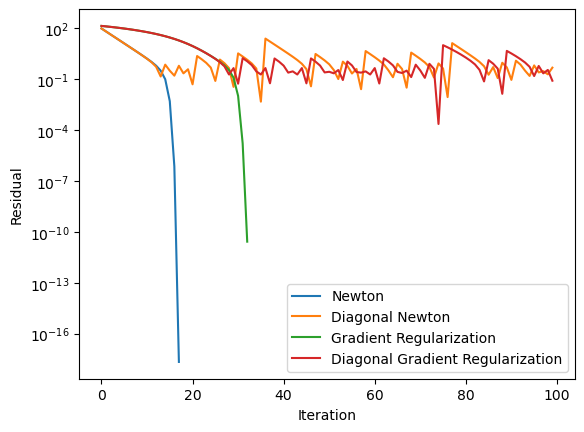

In [204]:
# plot the iteration process, y axis is in log scale
plt.plot(nwt_residuals, label='Newton')
plt.plot(diagnwt_residuals, label='Diagonal Newton')
plt.plot(grad_reg_residuals, label='Gradient Regularization')
plt.plot(diag_grad_reg_residuals, label='Diagonal Gradient Regularization')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.legend()